# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base.base_models import BaseModel
from base.data_processor import BenchmarkDataset
from base.model_creator import Optimizer, MTLApproach
from base.model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Removing rotation from operations of data augmentation' + \
            ' and using minor shift (width and height).',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '50 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_1,
        'reqs': list(cts.ICAO_REQ),
        'aligned': True,
        'benchmarking': {
            'use_benchmark_data': False,
            'benchmark_dataset': BenchmarkDataset.MNIST
        },
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 137157
Process ID: 150910
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Removing rotation from operations of data '
                               'augmentation and using minor shift (width and '
                               'height).',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '50 epochs',

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4926, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4926 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5761

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3612 (73.33%)
N_TRAIN_NOT_COMP: 1314 (26.67%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 408 (74.59%)
N_VALIDATION_NOT_COMP: 139 (25.41%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 222 (77.08%)
N_TEST_NOT_COMP: 66 (22.92%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3704 (75.19%)
N_TRAIN_NOT_COMP: 1222 (24.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 405 (74.04%)
N_VALIDATION_NOT_COMP: 142 (25.96%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 223 (77.43%)
N_TEST_NOT_COMP: 65 (22.57%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3388 (68.78%)
N_TRAIN_NOT_COMP: 1538 (31.22%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 373 (68.19%)
N_VALIDATION_NOT_COMP: 174 (31.81%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 195 (67.71%)
N_TEST_NOT_COMP: 93 (32.29%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3896 (79.09%)
N_TRAIN_NOT_COMP: 1030 (20.91%)
N_TRAIN_D

# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


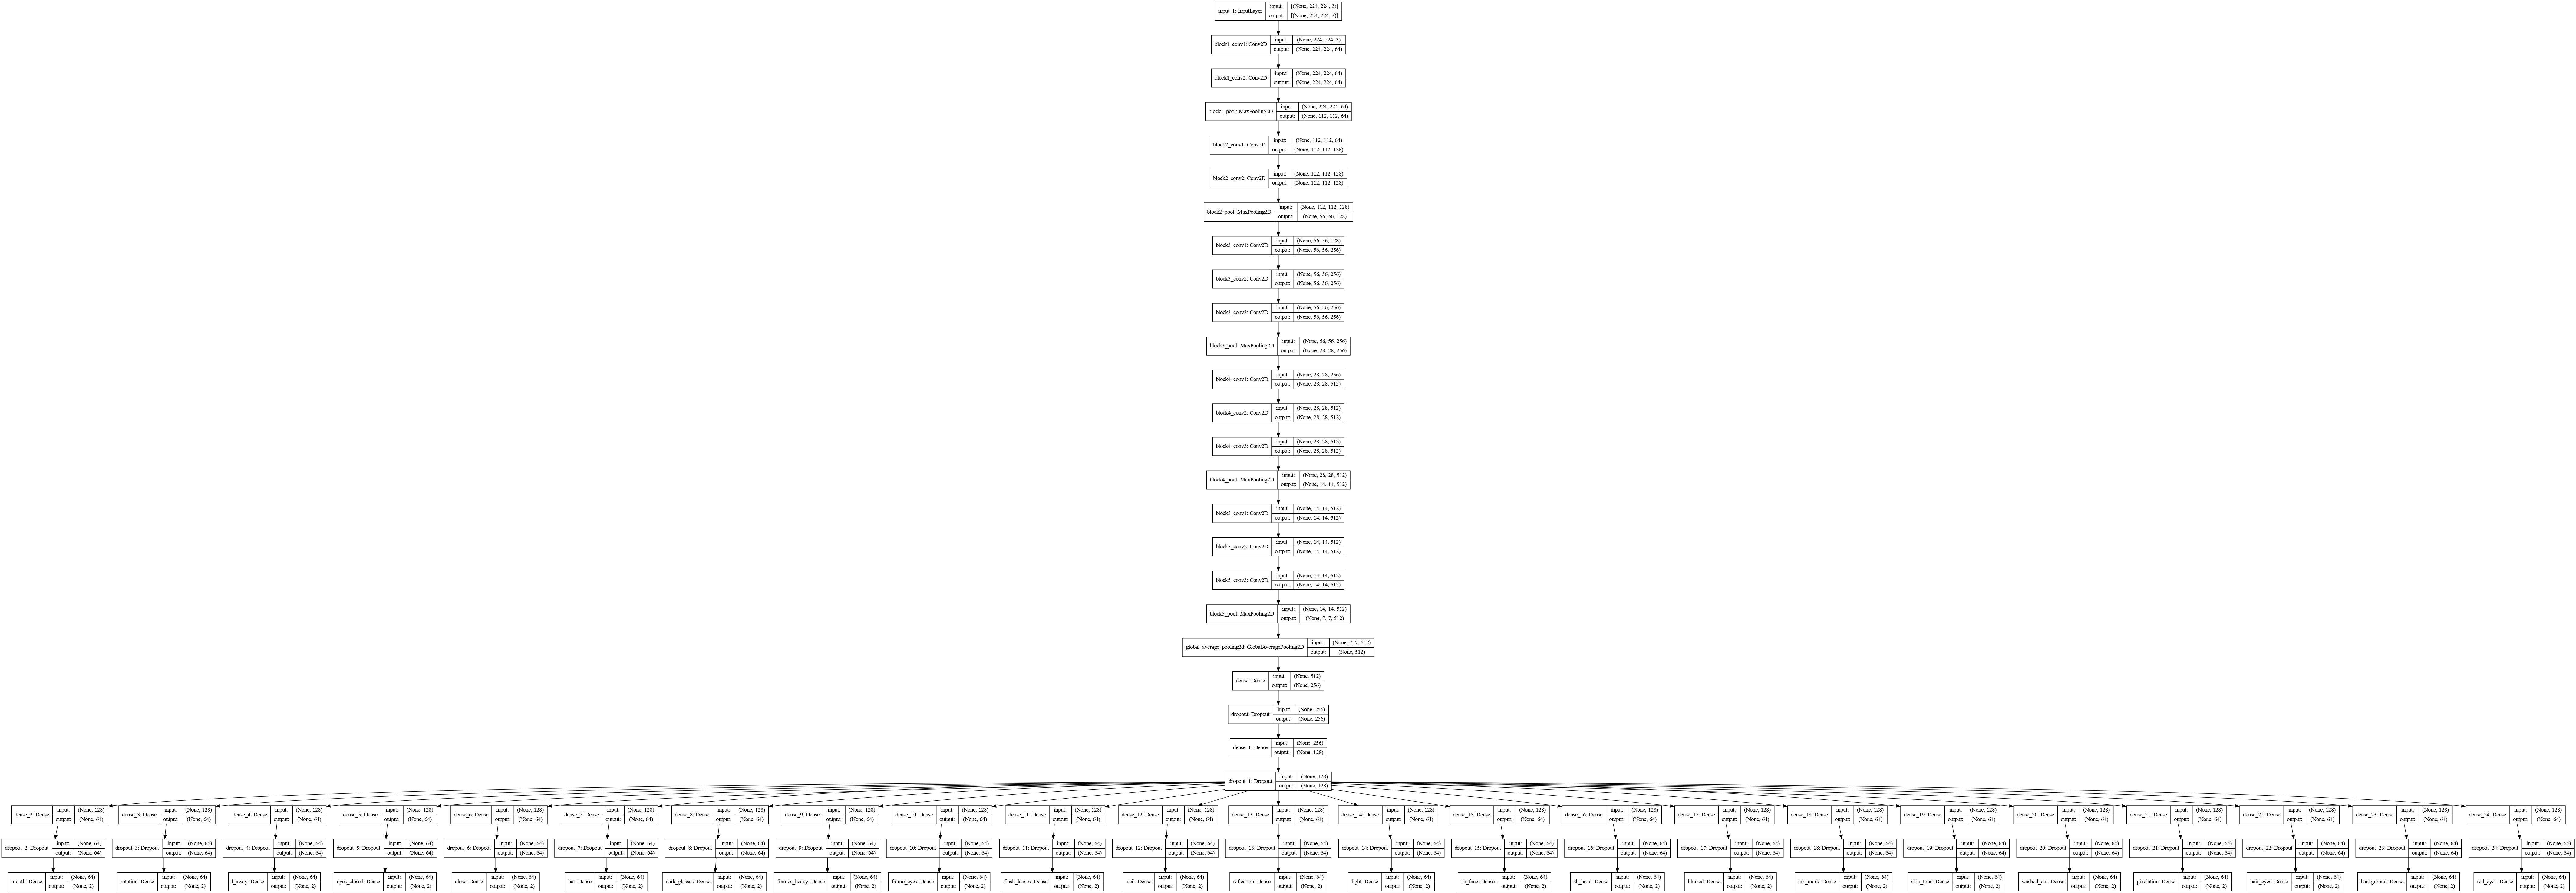

In [11]:
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,071,790
  .. Trainable params: 357,102
  .. Non-trainable params: 14,714,688
Epoch 1/2
153/153 [==============================] - 61s 324ms/step - loss: 1.0031 - mouth_loss: 0.6296 - rotation_loss: 0.5740 - l_away_loss: 0.5628 - eyes_closed_loss: 0.4161 - close_loss: 0.1213 - hat_loss: 0.4927 - dark_glasses_loss: 0.2908 - frames_heavy_loss: 0.0723 - frame_eyes_loss: 0.5354 - flash_lenses_loss: 0.4850 - veil_loss: 0.3412 - reflection_loss: 0.6922 - light_loss: 0.3657 - sh_face_loss: 0.6625 - sh_head_loss: 0.6511 - blurred_loss: 0.3659 - ink_mark_loss: 0.0484 - skin_tone_loss: 0.6864 - washed_out_loss: 0.1175 - pixelation_loss: 0.3290 - hair_eyes_loss: 0.4897 - background_loss: 0.6759 - red_eyes_loss: 0.4260 - mouth_accuracy: 0.7297 - rotation_accuracy: 0.7479 - l_away_accuracy: 0.6849 - eyes_closed_accuracy: 0.7869 - close_accuracy: 0.9830 - hat_accuracy: 0

# Plots

-------------------- draw training history -------------------


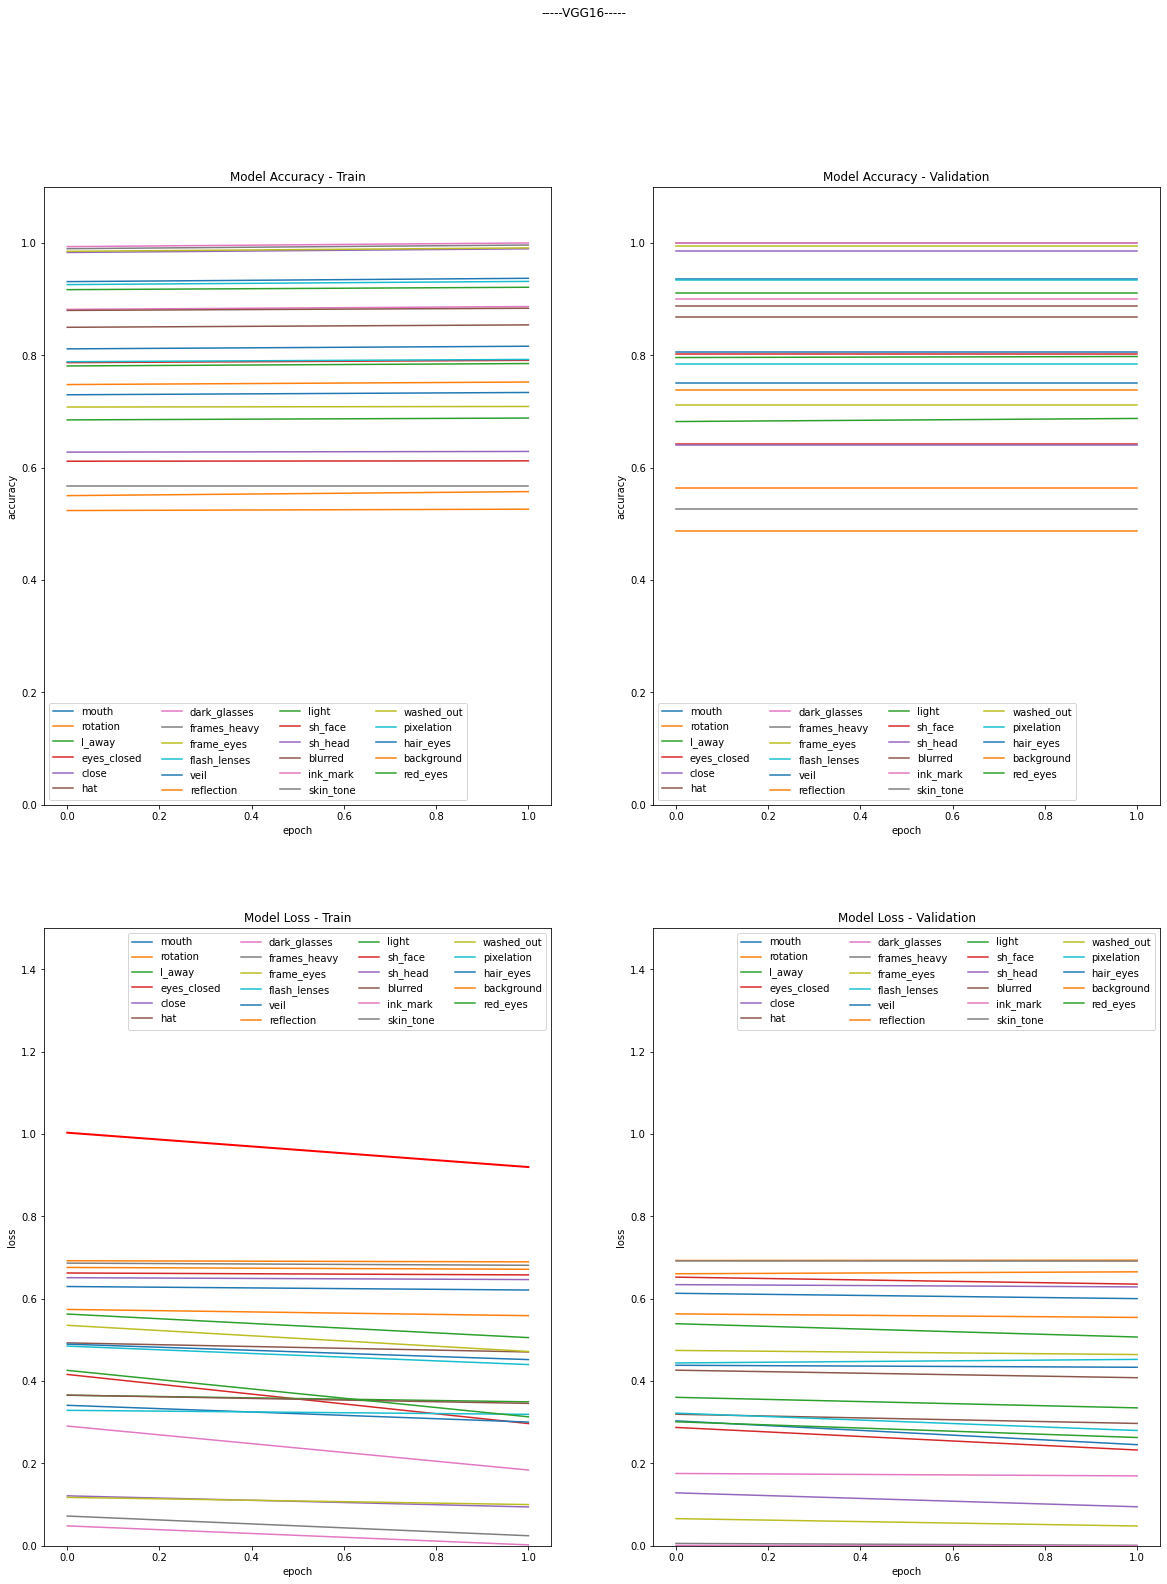

In [14]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 2s 106ms/step
Prediction finished!
Task: MOUTH


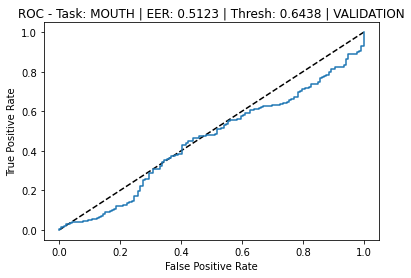

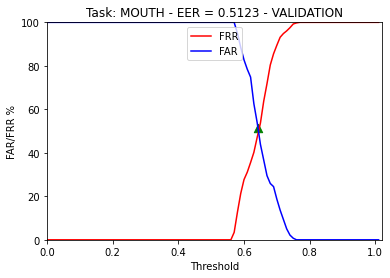

Task: MOUTH - EER_interp: 51.23% - Best Threshold: 0.6437596908094837
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.49      0.33       139
    COMPLIANT       0.74      0.49      0.59       408

     accuracy                           0.49       547
    macro avg       0.49      0.49      0.46       547
 weighted avg       0.61      0.49      0.52       547

Confusion matrix ----------------------------------------
FAR: 51.080000000000005% | FRR: 51.23% | EER_mean: 51.15% | TP: 199 | TN: 68 | FP: 71 | FN: 209
Accuracy ------------------------------------------------
Model Accuracy: 48.809999999999995%
---------------------------------------------------------
Task: ROTATION


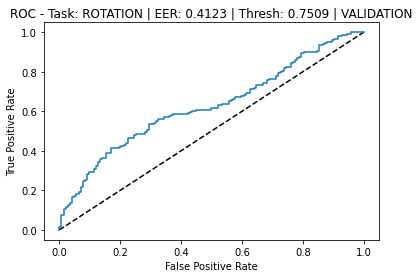

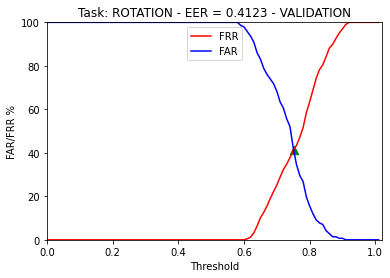

Task: ROTATION - EER_interp: 41.23% - Best Threshold: 0.7509025563919005
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.34      0.60      0.43       142
    COMPLIANT       0.81      0.59      0.68       405

     accuracy                           0.59       547
    macro avg       0.57      0.59      0.56       547
 weighted avg       0.68      0.59      0.62       547

Confusion matrix ----------------------------------------
FAR: 40.14% | FRR: 41.23% | EER_mean: 40.68% | TP: 238 | TN: 85 | FP: 57 | FN: 167
Accuracy ------------------------------------------------
Model Accuracy: 59.050000000000004%
---------------------------------------------------------
Task: L_AWAY


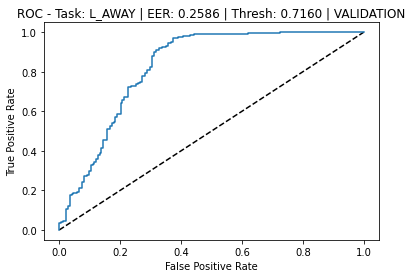

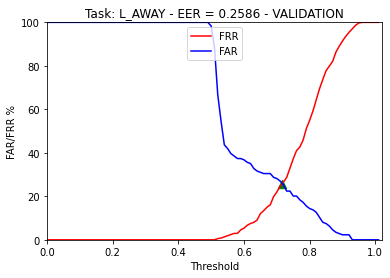

Task: L_AWAY - EER_interp: 25.86% - Best Threshold: 0.7160413861273985
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.74      0.65       174
    COMPLIANT       0.86      0.74      0.80       373

     accuracy                           0.74       547
    macro avg       0.72      0.74      0.72       547
 weighted avg       0.77      0.74      0.75       547

Confusion matrix ----------------------------------------
FAR: 25.86% | FRR: 25.740000000000002% | EER_mean: 25.8% | TP: 277 | TN: 129 | FP: 45 | FN: 96
Accuracy ------------------------------------------------
Model Accuracy: 74.22%
---------------------------------------------------------
Task: EYES_CLOSED


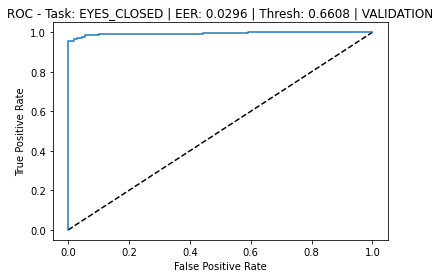

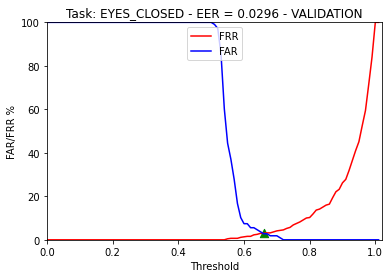

Task: EYES_CLOSED - EER_interp: 2.96% - Best Threshold: 0.6607792840459205
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.89      0.97      0.93       108
    COMPLIANT       0.99      0.97      0.98       439

     accuracy                           0.97       547
    macro avg       0.94      0.97      0.96       547
 weighted avg       0.97      0.97      0.97       547

Confusion matrix ----------------------------------------
FAR: 2.78% | FRR: 2.96% | EER_mean: 2.87% | TP: 426 | TN: 105 | FP: 3 | FN: 13
Accuracy ------------------------------------------------
Model Accuracy: 97.07000000000001%
---------------------------------------------------------
Task: CLOSE


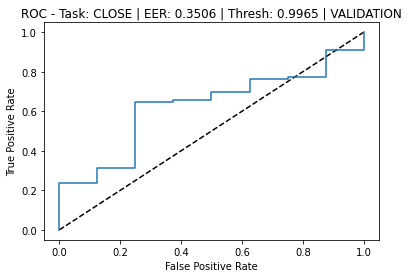

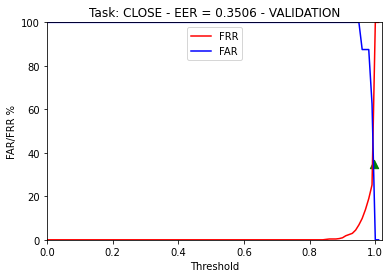

Task: CLOSE - EER_interp: 35.06% - Best Threshold: 0.99648010188883
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.03      0.75      0.06         8
    COMPLIANT       0.99      0.65      0.79       539

     accuracy                           0.65       547
    macro avg       0.51      0.70      0.42       547
 weighted avg       0.98      0.65      0.78       547

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 35.06% | EER_mean: 30.03% | TP: 350 | TN: 6 | FP: 2 | FN: 189
Accuracy ------------------------------------------------
Model Accuracy: 65.08%
---------------------------------------------------------
Task: HAT


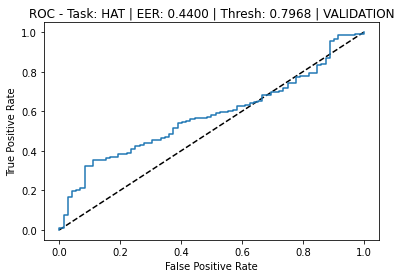

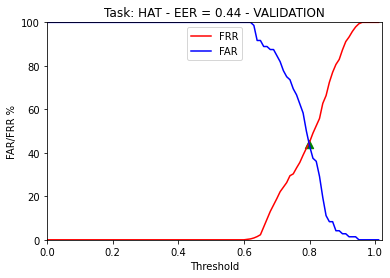

Task: HAT - EER_interp: 44.0% - Best Threshold: 0.7967501997947726
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.16      0.57      0.25        72
    COMPLIANT       0.90      0.56      0.69       475

     accuracy                           0.56       547
    macro avg       0.53      0.56      0.47       547
 weighted avg       0.80      0.56      0.63       547

Confusion matrix ----------------------------------------
FAR: 43.059999999999995% | FRR: 44.0% | EER_mean: 43.53% | TP: 266 | TN: 41 | FP: 31 | FN: 209
Accuracy ------------------------------------------------
Model Accuracy: 56.120000000000005%
---------------------------------------------------------
Task: DARK_GLASSES


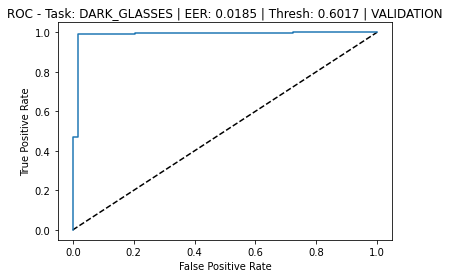

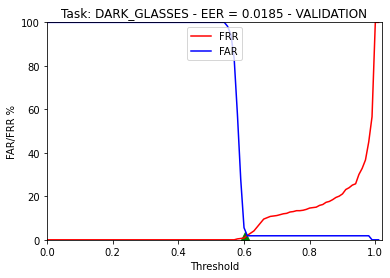

Task: DARK_GLASSES - EER_interp: 1.8499999999999999% - Best Threshold: 0.60173577070235
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.93      0.98      0.95        54
    COMPLIANT       1.00      0.99      0.99       493

     accuracy                           0.99       547
    macro avg       0.96      0.99      0.97       547
 weighted avg       0.99      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 1.8499999999999999% | FRR: 0.8099999999999999% | EER_mean: 1.3299999999999998% | TP: 489 | TN: 53 | FP: 1 | FN: 4
Accuracy ------------------------------------------------
Model Accuracy: 99.09%
---------------------------------------------------------
Task: FRAMES_HEAVY


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


ZeroDivisionError: division by zero

In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

In [ ]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Visualize Model Classification

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()